<a href="https://colab.research.google.com/github/advantgarde/Data-Analytics-Microcredential/blob/main/Python%20Projects/Daniel_Li_Unit3_Python_Advanced_Pandas_DataWrangling_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [286]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [287]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [288]:
type(df)

pandas.core.frame.DataFrame

In [289]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [290]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [291]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [292]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [293]:
# Mean of all salaries
round(df['salary'].mean(),2)

113706.46

In [294]:
# Median of all salaries
round(df['salary'].median(),2)

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [295]:
salaryBySex = df[['sex','salary']]

In [296]:
salaryBySex 

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [297]:
df_male = df[df['sex'] == 'Male']
male = df_male.groupby(['sex'])['salary'].median()
male

sex
Male    108043
Name: salary, dtype: int64

Finding the Median salary for all females

In [298]:
df_female = df[df['sex'] == 'Female']
female = df_female.groupby(['sex'])['salary'].median()
female

sex
Female    103750
Name: salary, dtype: int64

Comparing the Mean salary of Males and Females

In [299]:
male_mean = round(df_male['salary'].mean(),2)
male_mean

115090.42

In [300]:
female_mean = round(df_female['salary'].mean(),2)
female_mean

101002.41

In [301]:
# The difference between mean salaries of male and female
maleFemale_Difference = male_mean - female_mean
round(maleFemale_Difference, 2)

14088.01

# Data Wrangling – perform some basic transformations on the data

People who have 20+ years of experience (Total: 157), (Mean Salary: 122,520.66)

In [302]:
twenty_plus_exp = df[df['yrs.service'] >= 20]
twenty_plus_exp

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
...,...,...,...,...,...,...,...
384,385,Prof,A,27,21,Male,125192
386,387,Prof,A,29,27,Male,139219
388,389,Prof,A,38,36,Male,119450
392,393,Prof,A,33,30,Male,103106


In [303]:
plus20_mean = round(twenty_plus_exp['salary'].mean(), 2)
plus20_mean

122520.66

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [304]:
under_twenty_exp = df[df['yrs.service'] < 20]
under_twenty_exp

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
5,6,AssocProf,B,6,6,Male,97000
9,10,Prof,B,18,18,Female,129000
...,...,...,...,...,...,...,...
390,391,Prof,A,40,19,Male,166605
391,392,Prof,A,30,19,Male,151292
393,394,Prof,A,31,19,Male,150564
395,396,Prof,A,25,15,Male,95329


In [305]:
less20_mean = round(under_twenty_exp['salary'].mean(), 2)
less20_mean

107940.5

In [306]:
plus20_less20_exp = round(plus20_mean - less20_mean, 2)
plus20_less20_exp

14580.16

People who have salary of greater than or equal to 200,000

Your Findings here...


In [307]:
two_hundredK_club = df[df['salary'] >= 200000]
two_hundredK_club

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


# Rename values, subset columns, etc

In [308]:
df

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [309]:
df1 = df.rename(columns = {'Unnamed: 0':'Unique_Identifier'}, inplace = False)
df1

,Unique_Identifier,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [310]:
df1['Unique_Identifier'].is_unique

True

In [311]:
df2 = df1.set_index('Unique_Identifier')
df2

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
Unique_Identifier,,,,,,
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
393,Prof,A,33,30,Male,103106
394,Prof,A,31,19,Male,150564
395,Prof,A,42,25,Male,101738


In [312]:
df3 = df2[['sex', 'salary']]
df3.loc[2, 'salary'] = 185700
df3

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,sex,salary
Unique_Identifier,,
1,Male,139750
2,Male,185700
3,Male,79750
4,Male,115000
5,Male,141500
...,...,...
393,Male,103106
394,Male,150564
395,Male,101738


In [313]:
df2['sex'] = df['sex'].replace({'Male': 'M','Female': 'F'})
df2

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
Unique_Identifier,,,,,,
1,Prof,B,19,18,M,139750
2,Prof,B,20,16,M,173200
3,AsstProf,B,4,3,M,79750
4,Prof,B,45,39,M,115000
5,Prof,B,40,41,M,141500
...,...,...,...,...,...,...
393,Prof,A,33,30,M,103106
394,Prof,A,31,19,M,150564
395,Prof,A,42,25,M,101738


In [314]:
df2['sex'].isnull().sum()

1

In [315]:
df2.loc[397, 'sex'] = 'M'
df2

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
Unique_Identifier,,,,,,
1,Prof,B,19,18,M,139750
2,Prof,B,20,16,M,173200
3,AsstProf,B,4,3,M,79750
4,Prof,B,45,39,M,115000
5,Prof,B,40,41,M,141500
...,...,...,...,...,...,...
393,Prof,A,33,30,M,103106
394,Prof,A,31,19,M,150564
395,Prof,A,42,25,M,101738


# Create some simple visualizations showing some simple statistics

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f539520d550>,
      dtype=object)

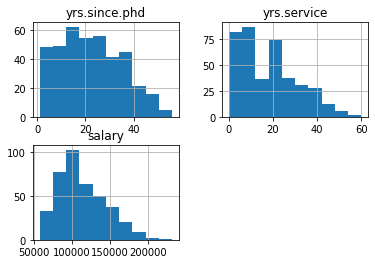

In [316]:
df2.hist()

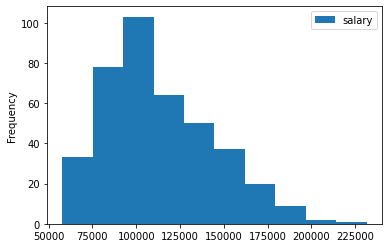

In [317]:
salaryBySex.plot(kind='hist')

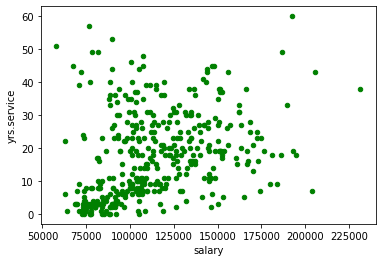

In [318]:
df2.plot(kind='scatter', x='salary', y='yrs.service', color='green')

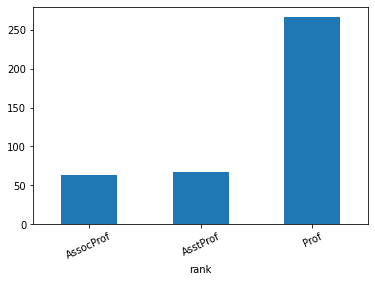

In [319]:
df2.groupby("rank")["rank"].count().sort_values(ascending=True).plot(kind='bar', rot=25)

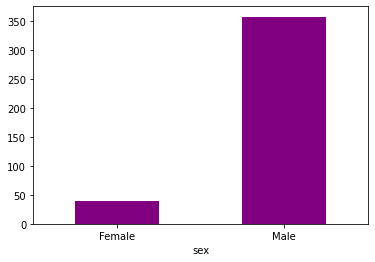

In [320]:
df1.groupby("sex")["sex"].count().plot(kind='bar', rot=0, color='Purple')

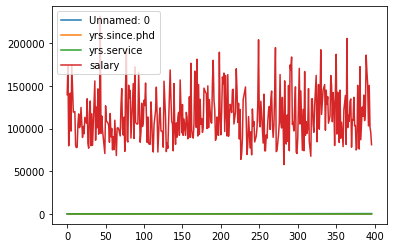

In [321]:
df_male.plot()

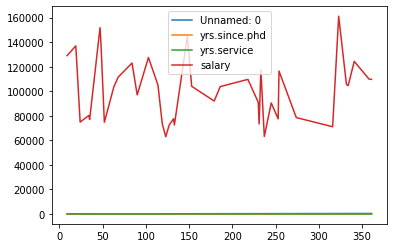

In [322]:
df_female.plot()

Your observations from the visuals: 

- Most years since Phd fall between 10 - 20 years
- Most years of service is 10 years or under
- Most salaries fall around 100k/yr, give or take
- The scatter plot confirms most years of service is under 10 years and  most salary ranges from 75k to 100k
- Associate Professors and Assistant Professor titles are around the same count but most titles are actual Professors
- The salary cap for male professors is a lot higher than female professors

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Professors on average make 6 figures but it is rare for them to make over 200k based on just the information from this dataset. There are also a lot more male professors than female professors. Male professors on average earn 14k plus more than female professors. 

I also discovered that the -

 Professors with or greater than 20 years of experience on average earn 14.6k more than professors with less than 20 years experience.



